# Import necessary libraries

In [1]:
import pandas as pd
import time
import random
import numpy as np
import math
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
import scikitplot as skplt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.linear_model import *
from sklearn.naive_bayes import *
from sklearn import metrics
from sklearn.inspection import permutation_importance
from sklearn.decomposition import PCA
from sklearn.neighbors import *
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import mutual_info_regression


# Import dataset

In [2]:
# Import dataset, skip the first row
data = pd.read_csv("card.csv", skiprows=[0])

# 1. Introduction to data set and data modeling problem

Card.csv includes data on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005. 

The dataset includes variables on: 
* ID of each client (ID)
* Amount of given credit in NT dollars (includes individual and family/supplementary credit (LIMIT_BAL)
* Gender (SEX)
* Level of education (EDUCATION)
* Marital status (MARRIAGE)
* Age in years (AGE)
* Repayment status according to month (PAY_0, PAY_2, PAY_3, PAY_4, * PAY_5, PAY_6)
* Amount of bill statement according to month (BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6)
* Amount of previous payment according to month (PAY_AMT1, PAY_AMT2, PAY_AMT3, PAY_AMT4, PAY_AMT5, PAY_AMT6)
* Default payment (default.payment.next.month). 


In this project, we will create a model that can identify customers who will default on their credit card payments in the next month.


# 2. Explorary Data Analysis

1. Get maximum insights from a data set
2. Uncover underlying structure
3. Extract important variables from the dataset
4. Detect outliers and anomalies(if any)
5. Test underlying assumptions
6. Determine the optimal factor settings

Some ideas for exploration:
- How does the probability of default payment vary by categories of different demographic variables?
- Which variables are the strongest predictors of default payment?

In [3]:
# View the first 5 rows of the dataset
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Displays the summary statistics 


In [61]:
# summary statistics, transposed for continuous data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


For ease of reading data, we rename the column "default payment next month" to "default"

### Data Types and Names

In [4]:
# Renaming the column default payment next month
data = data.rename(columns={"default payment next month" : "DEFAULT"})

In [5]:
# Changing the data type of the categorical variables to category
categorical_vars = ["SEX", "EDUCATION", "MARRIAGE", "PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6", "DEFAULT"]
for col in categorical_vars:
    data[col] = data[col].astype("category")

In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   ID         30000 non-null  int64   
 1   LIMIT_BAL  30000 non-null  int64   
 2   SEX        30000 non-null  category
 3   EDUCATION  30000 non-null  category
 4   MARRIAGE   30000 non-null  category
 5   AGE        30000 non-null  int64   
 6   PAY_0      30000 non-null  category
 7   PAY_2      30000 non-null  category
 8   PAY_3      30000 non-null  category
 9   PAY_4      30000 non-null  category
 10  PAY_5      30000 non-null  category
 11  PAY_6      30000 non-null  category
 12  BILL_AMT1  30000 non-null  int64   
 13  BILL_AMT2  30000 non-null  int64   
 14  BILL_AMT3  30000 non-null  int64   
 15  BILL_AMT4  30000 non-null  int64   
 16  BILL_AMT5  30000 non-null  int64   
 17  BILL_AMT6  30000 non-null  int64   
 18  PAY_AMT1   30000 non-null  int64   
 19  PAY_AMT2   30000 non-null

## Data Visualization of features

### Default

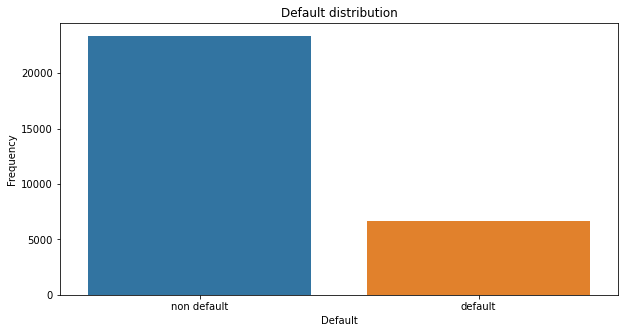

In [75]:
plt.figure(figsize=(10,5))
labels = ['non default','default']
sns.countplot(x="DEFAULT", data=data)
plt.title("Default distribution")
plt.xticks(range(2), labels)
plt.xlabel("Default")
plt.ylabel("Frequency")
plt.show()

From the above graph, we can observe that the data is unbalanced, with the number of non-default observations being greater than the number of default observations.

### Age

Kurtosis:0.044	Skewness:0.732


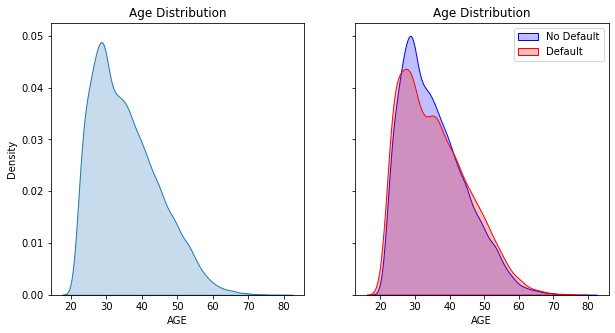

In [253]:
# Kernel Distribution Estimation (KDE) plot for Age with kurtosis and skewness
fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
sns.kdeplot(x="AGE", fill=True, data=data, ax=axs[0])
sns.kdeplot(data.loc[(data['DEFAULT'] == 0),'AGE'], fill=True, label='No Default', color='Blue', ax=axs[1])
sns.kdeplot(data.loc[(data['DEFAULT'] == 1),'AGE'], fill=True, label='Default', color='Red', ax=axs[1])
axs[0].set_title("Age Distribution")
axs[1].set_title("Age Distribution")
axs[1].legend()
kurtosis_age = round(st.kurtosis(data['AGE']), 3)
skewness_age = round(st.skew(data['AGE']),3)
print(f'Kurtosis:{kurtosis_age}\tSkewness:{skewness_age}')

Observing the shape of the kurtosis graph for Age, we observe that it has a distribution close to normal. Since the kurtosis of 0.044 is less than 3, and the skewness of 0.732 is greater than 0.5 but less than 1, the distribution of age is moderately skewed with a normal distribution.

### Limit Balance

Kurtosis:0.536	Skewness:0.993


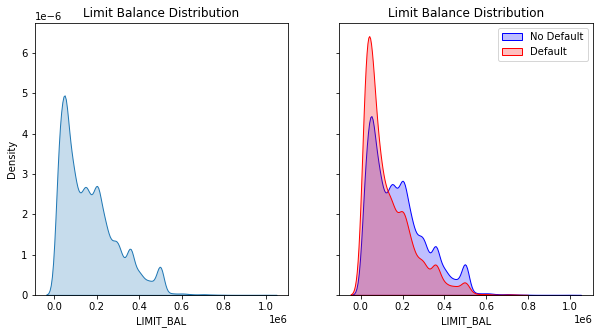

In [254]:
# Kernel Distribution Estimation (KDE) plot for Limit Balance with kurtosis and skewness
fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
sns.kdeplot(x="LIMIT_BAL", fill=True, data=data, ax=axs[0])
sns.kdeplot(data.loc[(data['DEFAULT'] == 0),'LIMIT_BAL'], fill=True, label='No Default', color='Blue', ax=axs[1])
sns.kdeplot(data.loc[(data['DEFAULT'] == 1),'LIMIT_BAL'], fill=True, label='Default', color='Red', ax=axs[1])
axs[0].set_title("Limit Balance Distribution")
axs[1].set_title("Limit Balance Distribution")
axs[1].legend()
kurtosis_bal = round(st.kurtosis(data['LIMIT_BAL']), 3)
skewness_bal = round(st.skew(data['LIMIT_BAL']),3)
print(f'Kurtosis:{kurtosis_bal}\tSkewness:{skewness_bal}')

Observing the shape of the kurtosis graph for Limit Balance, we observe that it has a distribution close to normal. Since the kurtosis of 0.536 is less than 3, and the skewness of 0.993 is greater than 0.5 but less than 1, the distribution of age is moderately positively skewed with a normal distribution.

### Marriage

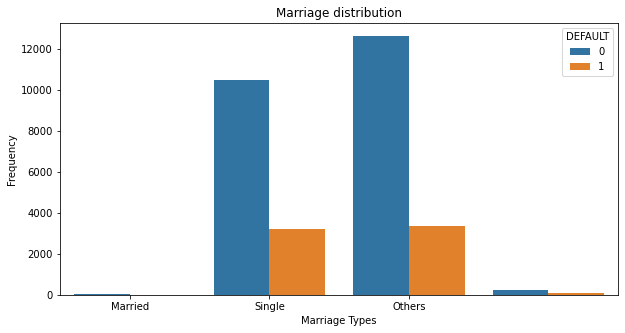

In [73]:
plt.figure(figsize=(10,5))
labels = ['Married','Single', 'Others']
sns.countplot(x="MARRIAGE", hue="DEFAULT", data=data)
plt.title("Marriage distribution")
plt.xticks(range(3), labels)
plt.xlabel("Marriage Types")
plt.ylabel("Frequency")
plt.show()

From this, we can observe that the number of observations who are "married" and "single" are mostly balanced. However, the number of non-default observations under each category is significantly larger than the number of default observations. 

### Gender

In [1]:
plt.figure(figsize=(10,5))
sns.countplot(x="SEX", hue="DEFAULT", data=data)
plt.title("Sex distribution")
plt.ylabel("Frequency", fontsize=12)
plt.xticks([0,1],['Male', 'Female'], fontsize = 12)
plt.show()

NameError: name 'plt' is not defined

From the graph above, we can observe that there are more "female" observations than "male" in the dataset. The the number of non-default observations under each category is significantly larger than the number of default observations. 

### Education

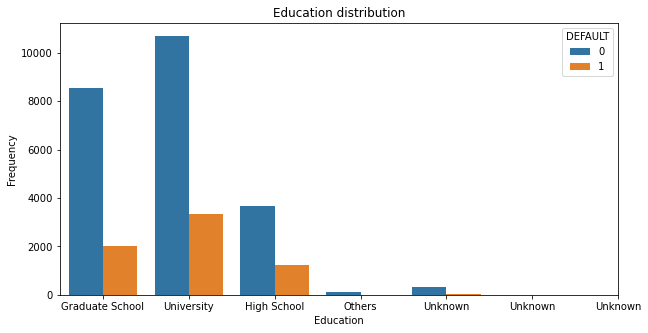

In [132]:
plt.figure(figsize=(10,5))
labels_edu = ["Graduate School", "University", "High School", "Others", "Unknown", "Unknown", "Unknown"]
sns.countplot(x="EDUCATION", hue="DEFAULT",data=data)
plt.title("Education distribution")
plt.xticks(range(7), labels_edu)
plt.xlabel("Education")
plt.ylabel("Frequency")
plt.show()

### Correlation Matrix

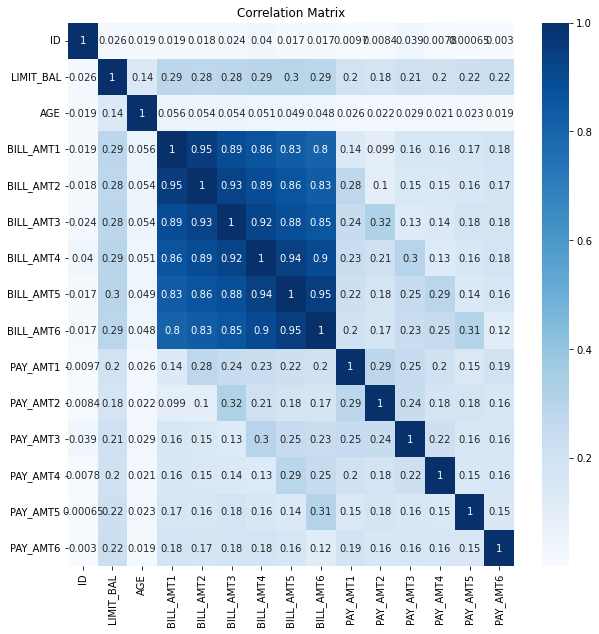

In [131]:
# Correlation Matrix for each column
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),cbar=True,annot=True,cmap='Blues')
plt.title("Correlation Matrix")
plt.show()

From the correlation matrix, we can observe that the repayment status for each month have high correlation with each other. Additionally, the amount of bill statement for each month are also highly positively correlated to one another.

# 3. Data Pre-processing

## Data validation 

### Checking for null values and anomalies

In [14]:
# Checks for missing values
data.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
DEFAULT      0
dtype: int64

The dataset has no missing data, thus there is no need to resolve incompleteness.

### Checking for data inconsistencies

In [243]:
# Check unique values in each column to see if any values do not fit
for col in data.columns:
    print(f"{col} : {data[col].unique()}")

ID : [    1     2     3 ... 29998 29999 30000]
LIMIT_BAL : [  20000  120000   90000   50000  500000  100000  140000  200000  260000
  630000   70000  250000  320000  360000  180000  130000  450000   60000
  230000  160000  280000   10000   40000  210000  150000  380000  310000
  400000   80000  290000  340000  300000   30000  240000  470000  480000
  350000  330000  110000  420000  170000  370000  270000  220000  190000
  510000  460000  440000  410000  490000  390000  580000  600000  620000
  610000  700000  670000  680000  430000  550000  540000 1000000  530000
  710000  560000  520000  750000  640000   16000  570000  590000  660000
  720000  327680  740000  800000  760000  690000  650000  780000  730000]
SEX : [2, 1]
Categories (2, int64): [1, 2]
EDUCATION : [2, 1, 3, 5, 4]
Categories (5, int64): [1, 2, 3, 4, 5]
MARRIAGE : [1, 2, 3]
Categories (3, int64): [1, 2, 3]
AGE : [24 26 34 37 57 29 23 28 35 51 41 30 49 39 40 27 47 33 32 54 58 22 25 31
 46 42 43 45 56 44 53 38 63 36 52 48 55 

### Resolving data inconsistencies

In [6]:
# Replace 0 values in marriage and education to the others and unknown values respectively
data["MARRIAGE"].replace({0:3},inplace=True)
data["EDUCATION"].replace({0:5},inplace=True)
data["EDUCATION"].replace({6:5},inplace=True)

# Replace Pay_i negative numbers to zero to avoid negative values
labels_pay = ["PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]
for pay in labels_pay:
    data[pay].replace({-2:0}, inplace=True)
    data[pay].replace({-1:0}, inplace=True)


### Checking for noise

From the kurtosis graphs for age and limit balance from part 1, we can deduce that there are no extreme outliers for the age and limit balance variables. There is no need to correct the dataset for noise.

# 4. Feature Selection

### Chi-squared Test

We apply Chi-squared Test to categorial features, namely Sex, Education, Marriage, and the repayment status for each month, to evaluate the likelihood of association between them.

In [9]:
# Chi-square test
categorical_vars = ["SEX", "EDUCATION", "MARRIAGE", "PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]
X_chi = pd.DataFrame()
for col in categorical_vars:
    X_chi[col] = data[col].astype("category")
Y = data['DEFAULT']
counter = 0
print("p-value for Chi-square test:")
for col in categorical_vars:
    print(f'{col}: {round(chi2(X_chi, Y)[1][counter], 3)}')
    counter += 1

p-value for Chi-square test:
SEX: 0.008
EDUCATION: 0.007
MARRIAGE: 0.046
PAY_0: 0.0
PAY_2: 0.0
PAY_3: 0.0
PAY_4: 0.0
PAY_5: 0.0
PAY_6: 0.0


From the results of the Chi-Squared Test, all the variables have low p-values, thus we can reject the null hypothesis that the variables are independent of each other to conclude that the attributes are ssociated with one another. Thus, we will include all categorial features as they are all possibly useful input attributes in the model in predicting whether one will default on payments.

# 5. Model Selection

### Formatting and splitting of data

In [7]:
def calculate_runtime(t0, t1):
    return t1 - t0

In [10]:
X_Main = data.drop(columns=["DEFAULT", "ID"])
X_train, X_test, Y_train, Y_test = train_test_split(X_Main, Y, test_size=0.25, random_state=1234)

In [11]:
# Standardization fo X_train and X_test data to standard normal
sc = StandardScaler()
sc.fit(X_train)
X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)

### Logistic Regression

Accuracy: 81.6%
Run Time: 0.0853s


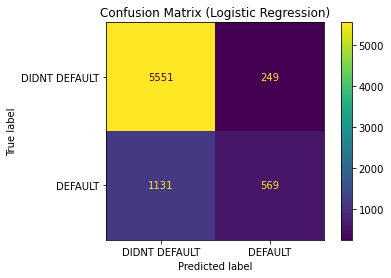

In [12]:
# Logistic Regression
t0 = time.time()
loglf = LogisticRegression()
loglf.fit(X_train_scaled, Y_train)
y_pred_log = loglf.predict(X_test_scaled)
accuracy_log = accuracy_score(Y_test, y_pred_log) * 100
print(f"Accuracy: {round(accuracy_log, 4)}%")
print(f"Run Time: {round(calculate_runtime(t0, time.time()),4)}s")
plot_confusion_matrix(loglf, X_test_scaled, Y_test, values_format='d', display_labels=["DIDNT DEFAULT", "DEFAULT"])
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()

### Naive Bayes

Accuracy: 76.7867%
Run Time: 0.0206s


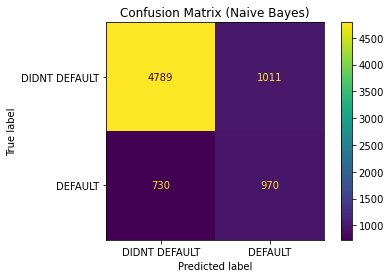

In [13]:
# Bayes Regression 
t0 = time.time()
nblf = GaussianNB()
nblf.fit(X_train_scaled, Y_train)
y_pred_nb = nblf.predict(X_test_scaled)
accuracy_nb = accuracy_score(Y_test, y_pred_nb) * 100
print(f"Accuracy: {round(accuracy_nb, 4)}%")
print(f"Run Time: {round(calculate_runtime(t0, time.time()),4)}s")
plot_confusion_matrix(nblf, X_test_scaled, Y_test, values_format='d', display_labels=["DIDNT DEFAULT", "DEFAULT"])
plt.title('Confusion Matrix (Naive Bayes)')
plt.show()

In [21]:
average_class_accuracy = (4789/(4789+1011) + 970/(970+730))/2
average_class_accuracy

0.6981389452332657

### Stochastic Gradient Descent

Accuracy: 81.0267%
Run Time: 0.1421s


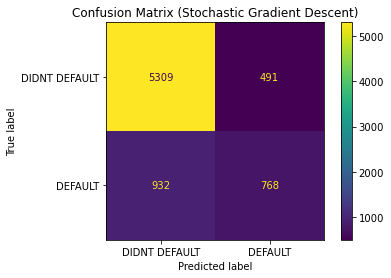

In [14]:
t0 = time.time()
sgd = SGDClassifier()
sgd.fit(X_train_scaled, Y_train)
y_pred_sgd = sgd.predict(X_test_scaled)
accuracy_sgd = accuracy_score(Y_test, y_pred_sgd) * 100
print(f"Accuracy: {round(accuracy_sgd, 4)}%")
print(f"Run Time: {round(calculate_runtime(t0, time.time()),4)}s")
plot_confusion_matrix(sgd, X_test_scaled, Y_test, values_format='d', display_labels=["DIDNT DEFAULT", "DEFAULT"])
plt.title('Confusion Matrix (Stochastic Gradient Descent)')
plt.show()

In [ ]:
average_class_accuracy = (4789/(4789+1011) + 970/(970+730))/2


### Support Vector Machine

Accuracy: 81.7067%
Run Time: 140.4107s


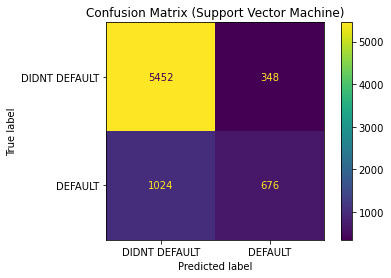

In [15]:
# Kernel = Linear
t0 = time.time()
clf = svm.SVC(kernel="linear", probability=True)
clf.fit(X_train_scaled, Y_train)
y_pred_svm = clf.predict(X_test_scaled)
accuracy_svm = accuracy_score(Y_test, y_pred_svm) * 100
print(f"Accuracy: {round(accuracy_svm, 4)}%")
print(f"Run Time: {round(calculate_runtime(t0, time.time()),4)}s")
plot_confusion_matrix(clf, X_test_scaled, Y_test, values_format='d', display_labels=["DIDNT DEFAULT", "DEFAULT"])
plt.title('Confusion Matrix (Support Vector Machine)')
plt.show()

In [22]:
average_class_accuracy = (5452/(5452+348) + 676/(1024+676))/2
average_class_accuracy

0.6688235294117647

Accuracy: 81.6533%
Run Time: 120.5386s


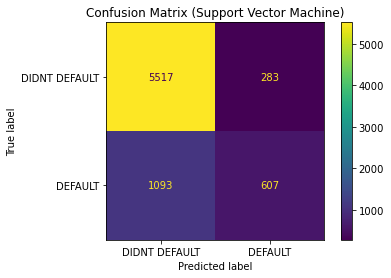

In [227]:
# Kernel = default = rbf, gamma = 'auto'
clf_v2 = svm.SVC(gamma='auto')
clf_v2.fit(X_train_scaled, Y_train)
y_pred_svm_v2 = clf_v2.predict(X_test_scaled)
accuracy_svm_v2 = accuracy_score(Y_test, y_pred_svm_v2) * 100
print(f"Accuracy: {round(accuracy_svm_v2, 4)}%")
print(f"Run Time: {round(calculate_runtime(t0, time.time()),4)}s")
plot_confusion_matrix(clf_v2, X_test_scaled, Y_test, values_format='d', display_labels=["DIDNT DEFAULT", "DEFAULT"])
plt.title('Confusion Matrix (Support Vector Machine)')
plt.show()

# 6. Evaluation of Models

## ROC Curve

ROC_AUC:  0.748


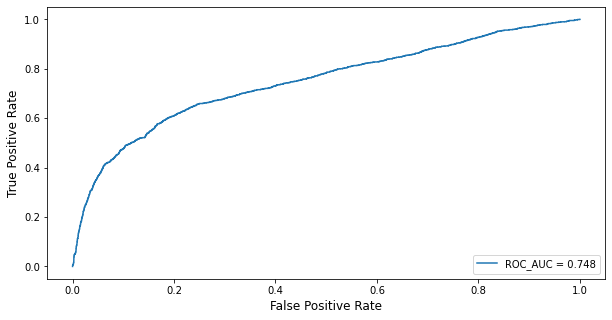

In [341]:
plt.figure(figsize=(10,5))
clf_pred_proba = clf.predict_proba(X_test_scaled)[:,1]
loglf_pred_proba = loglf.predict_proba(X_test_scaled)[:,1]


rf_roc_auc = metrics.roc_auc_score(Y_test, clf_pred_proba)
print('ROC_AUC: ', round(rf_roc_auc, 4))
rf_fpr, rf_tpr, thresholds = metrics.roc_curve(Y_test, clf_pred_proba)

plt.plot(rf_fpr,rf_tpr, label = 'ROC_AUC = %0.3f' % rf_roc_auc)

plt.xlabel("False Positive Rate", fontsize= 12)
plt.ylabel("True Positive Rate", fontsize= 12)
plt.legend(loc="lower right")

plt.show()

## Precision-Recall Curve

<Figure size 720x360 with 0 Axes>

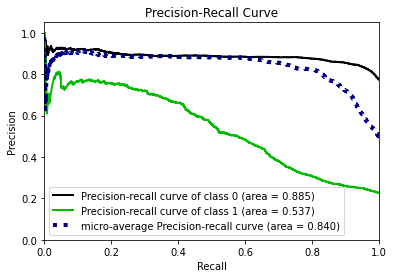

In [345]:
plt.figure(figsize=(10,5))
skplt.metrics.plot_precision_recall(Y_test, clf.predict_proba(X_test_scaled))
plt.show()

## Cumulative Gains Curve and Lift Curve

<Figure size 720x360 with 0 Axes>

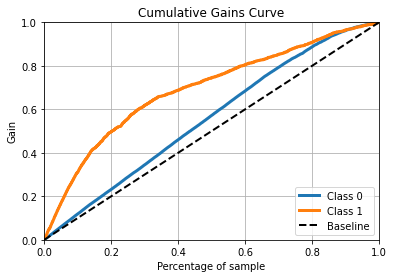

In [343]:
plt.figure(figsize=(10,5))
skplt.metrics.plot_cumulative_gain(Y_test, clf.predict_proba(X_test_scaled))
plt.show()

<AxesSubplot:title={'center':'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

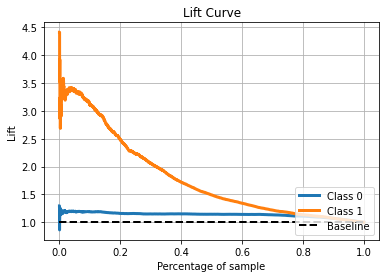

In [61]:
skplt.metrics.plot_lift_curve(Y_test, clf.predict_proba(X_test_scaled))

# 7. Room for improvement

In [337]:
# Looking at the mutual information between X_train and Y_train values before scaling
mutual_info = mutual_info_classif(X_train, Y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info = mutual_info.sort_values(ascending=False)

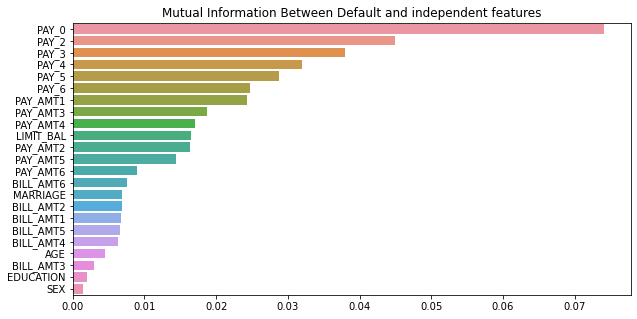

In [338]:
plt.figure(figsize=(10,5))
sns.barplot(x=mutual_info, y=mutual_info.index)
plt.title("Mutual Information Between Default and independent features")
# Spplt.show()

In [347]:
# Splitting the data based on the top 10 important features
X_important = data[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'PAY_AMT1', 'PAY_AMT3', 'PAY_AMT4', 'LIMIT_BAL']]
X_train_imp, X_test_imp, Y_train_imp, Y_test_imp = train_test_split(X_important, Y, test_size=0.25, random_state=1234)

In [348]:
# Standardize important features
sc = StandardScaler()
sc.fit(X_train_imp)
X_train_scaled_imp = sc.transform(X_train_imp)
X_test_scaled_imp = sc.transform(X_test_imp)

Accuracy: 81.6933%
Run Time: 62.3666s


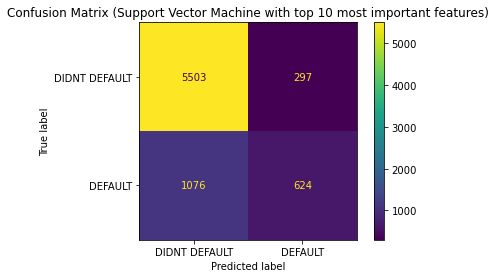

In [350]:
# SVM with new important features
t0 = time.time()
clf = svm.SVC(kernel="linear", probability=True)
clf.fit(X_train_scaled_imp, Y_train_imp)
y_pred_svm = clf.predict(X_test_scaled_imp)
accuracy_svm = accuracy_score(Y_test_imp, y_pred_svm) * 100
print(f"Accuracy: {round(accuracy_svm, 4)}%")
print(f"Run Time: {round(calculate_runtime(t0, time.time()),4)}s")
plot_confusion_matrix(clf, X_test_scaled_imp, Y_test_imp, values_format='d', display_labels=["DIDNT DEFAULT", "DEFAULT"])
plt.title('Confusion Matrix (Support Vector Machine with top 10 most important features)')
plt.show()